In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imsave, imread
from skimage import data
from skimage import color
from skimage.filters import threshold_otsu

In [2]:
def RGB2HEX(color):
    
    return "#{:02x}{:02x}{:02x}".format(int(color[2]), 
                                        int(color[1]), 
                                        int(color[0]))

def plot_images(img):
    
    plt.figure(figsize = (15, 10))
    plt.imshow(img)
    plt.show()
    
def mergex(mask, img):
    
    result = img.copy()
    
    result[:, :, 0] = mask * img[:, :, 0]
    result[:, :, 1] = mask * img[:, :, 1]
    result[:, :, 2] = mask * img[:, :, 2]
    
    return result

def segment_images(image):
    thresh = threshold_otsu(image)
    return image > thresh

### read image

In [3]:
# img_original = imread('teste.jpg')
img_original = imread('only_color.png')

### Segmentation

In [4]:
img_segmented = segment_images(img_original[:,:,0])

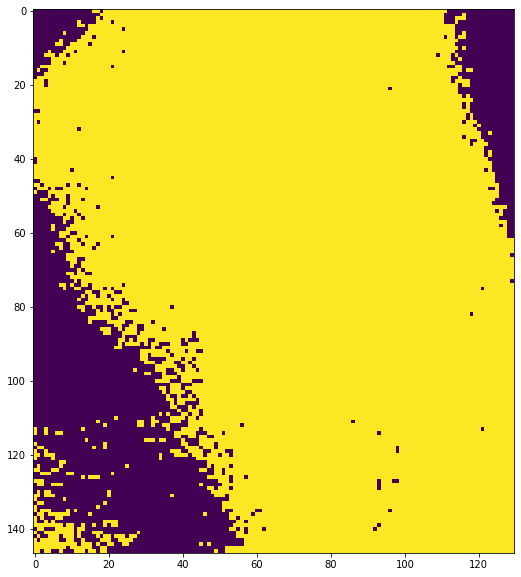

In [5]:
plot_images(img_segmented)

In [6]:
only_face_RGB = mergex(img_segmented, img_original)
only_face_BGR = only_face_RGB[:, :, ::-1]

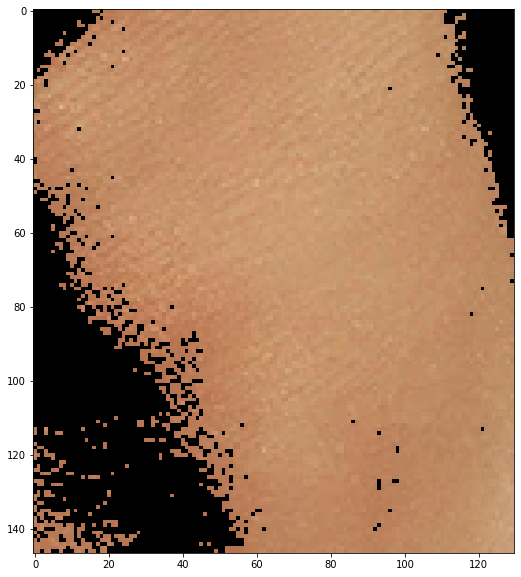

In [7]:
plot_images(only_face_RGB)

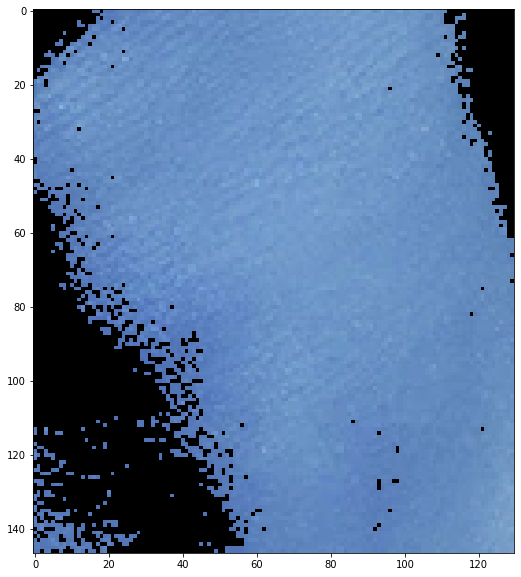

In [8]:
plot_images(only_face_BGR)

In [9]:
img_HSV = cv2.cvtColor(only_face_BGR, cv2.COLOR_BGR2HSV)
img_YCrCb = cv2.cvtColor(only_face_BGR, cv2.COLOR_BGR2YCrCb)

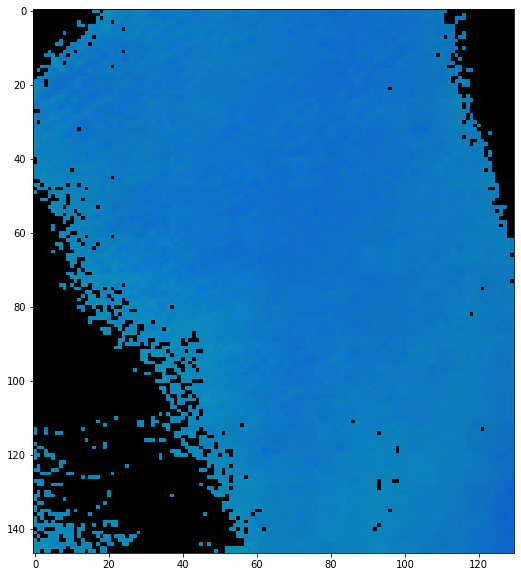

In [10]:
plot_images(img_HSV)

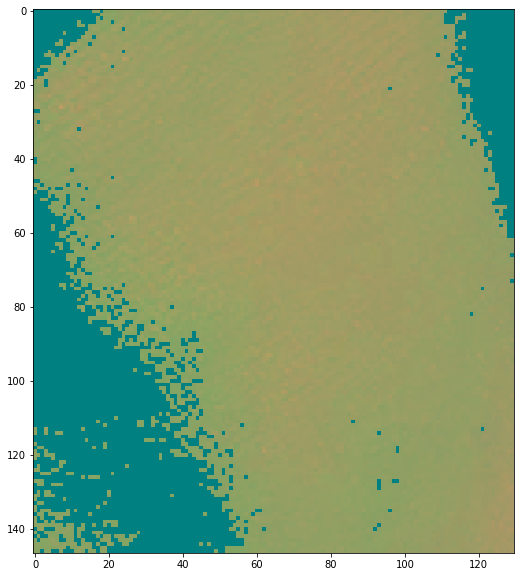

In [11]:
plot_images(img_YCrCb)

In [12]:
blue = []
green = []
red = []

height, width, channels = only_face_BGR.shape

for i in range(height):
    for j in range(width):
        if((img_HSV.item(i, j, 0) <= 170) and (140 <= img_YCrCb.item(i, j, 1) <= 170) and (90 <= img_YCrCb.item(i, j, 2) <= 120)):
            blue.append(only_face_BGR[i, j].item(0))
            green.append(only_face_BGR[i, j].item(1))
            red.append(only_face_BGR[i, j].item(2))
        else:
            only_face_BGR[i, j] = [0, 0, 0]

In [13]:
skin_tone_estimate_BGR = [np.mean(blue),
                          np.mean(green), 
                          np.mean(red)]

In [14]:
skin_tone_estimate_BGR = [np.mean(blue), np.mean(green), np.mean(red)]

In [15]:
(skin_tone_estimate_BGR[0], skin_tone_estimate_BGR[1], skin_tone_estimate_BGR[2])

(102.4156974855435, 142.04229744655967, 194.9994152426743)

In [16]:
RGB2HEX(skin_tone_estimate_BGR)

'#c28e66'

In [17]:
img_original[:,:,0][0] = skin_tone_estimate_BGR[0]
img_original[:,:,1][0] = skin_tone_estimate_BGR[1]
img_original[:,:,2][0] = skin_tone_estimate_BGR[2]

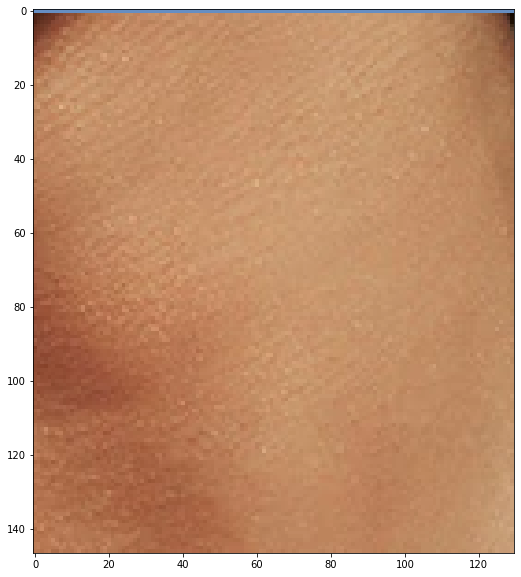

In [18]:
plot_images(img_original)